**Hands-on Session on VGGNet**

**Introduction to VGGNet:**

VGGNet is a convolutional neural network architecture characterized by its use of small (3x3) convolution filters and deep architecture, typically pretrained on ImageNet. The most popular versions are VGG16 and VGG19, indicating the number of layers.

**Networks Using Blocks (VGG)**

While AlexNet demonstrated that deep convolutional neural networks (CNNs) can achieve impressive performance, it did not provide a clear framework for researchers to follow when designing new networks. In the subsequent sections, we will explore several heuristic concepts that are commonly applied in the design of deep networks.

Advancements in this field reflect a similar evolution seen in chip design, where engineers transitioned from placing individual transistors to creating logical elements and, eventually, logic blocks. Likewise, the development of neural network architectures has become increasingly abstract, with researchers shifting their focus from single neurons to entire layers, and now to blocks—repeating patterns of layers.

The concept of using blocks was first introduced by the Visual Geometry Group (VGG) at Oxford University, which developed the VGG network. Implementing these repeated structures in code is straightforward with modern deep learning frameworks, as it can be done using loops and subroutines.

**VGG Blocks**

The fundamental component of traditional CNNs is a series of operations that includes: (i) a convolutional layer with padding to preserve the resolution, (ii) a non-linear activation function like ReLU, and (iii) a pooling layer, typically a max pooling layer. A single VGG block comprises a series of convolutional layers followed by a max pooling layer for spatial downsampling. In the original VGG paper by Simonyan and Zisserman (2014), the authors utilized convolutions with a kernel size that included padding of 1 (maintaining both height and width) and applied max pooling with a stride of 2, effectively reducing the resolution by half after each block.

**Example of a VGG Network**

Similar to AlexNet and LeNet, the VGG Network is divided into two main components: the first primarily consists of convolutional and pooling layers, while the second comprises fully connected layers.

The convolutional section of the network is formed by connecting several VGG blocks in sequence. The fully connected portion of the VGG network mirrors that of AlexNet.

The original VGG network includes five convolutional blocks, with the first two containing one convolutional layer each and the last three containing two convolutional layers each. The initial block has 64 output channels, and each subsequent block doubles the number of output channels, culminating at 512. As this network comprises 13 convolutional layers and 3 fully connected layers, it is commonly referred to as VGG16.

**Summary**

1. VGG16 builds a network by utilizing reusable convolutional blocks. Variations in VGG models arise from differences in the number of convolutional layers and output channels within each block.

2. The implementation of blocks results in concise representations of the network architecture, facilitating the efficient design of complex networks.

3. In their VGG paper, Simonyan and Zisserman explored various architectures, discovering that multiple layers of deep and narrow convolutions proved to be more effective than fewer layers of wider convolutions.

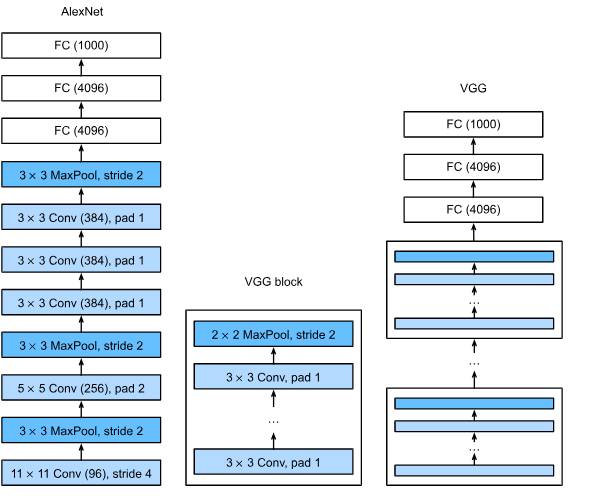

**Figure:** VGGNet Model Architecture (Picture Courtesy: Original source of the image)

**Pretrained Model Details**

**Model Used:** VGG16

**Dataset Used for Pretraining:** ImageNet (over 1 million images across 1000 classes)

**Input Shape:** (32, 32, 3) for CIFAR-10 (the base model expects larger images but is adapted here for demonstration)

**Loading Libraries and Preparing Data:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

**Building the Model with VGG16:** Load the VGG16 model pretrained on ImageNet, excluding the top layers.
Add custom layers for the CIFAR-10 dataset.

In [2]:
# Load the VGG16 model without the top layer and specify input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Data Augmentation:** Implement data augmentation to improve model robustness.

In [3]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)

**Training the Model:** Train the model using the augmented data.

In [4]:
# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) // 32,
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 186s 117ms/step - accuracy: 0.3477 - loss: 1.8205 - val_accuracy: 0.5068 - val_loss: 1.3892
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:54 112ms/step - accuracy: 0.5938 - loss: 1.4475

C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5938 - loss: 1.4475 - val_accuracy: 0.5084 - val_loss: 1.3849
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.4603 - loss: 1.5226 - val_accuracy: 0.5390 - val_loss: 1.3084
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.4062 - loss: 1.3559 - val_accuracy: 0.5358 - val_loss: 1.3105
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.4845 - loss: 1.4655 - val_accuracy: 0.5437 - val_loss: 1.2967
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4688 - loss: 1.6333 - val_accuracy: 0.5434 - val_loss: 1.2960
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.4844 - loss: 1.4458 - val_accuracy: 0.5470 - val_loss: 1.2763
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5312 - loss: 1.3671 - val_accuracy: 0.5462 - val_loss: 1.2767
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 204s 131ms/step - accuracy: 0.4969 - lo

**Evaluating the Model:** Evaluate the model on the test dataset.

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 29s - 94ms/step - accuracy: 0.5560 - loss: 1.2569


In [6]:
print(f'\nTest accuracy: {test_acc * 100:.2f}%')


Test accuracy: 55.60%


**Visualizing Training Results:** Plot the training and validation accuracy and loss.

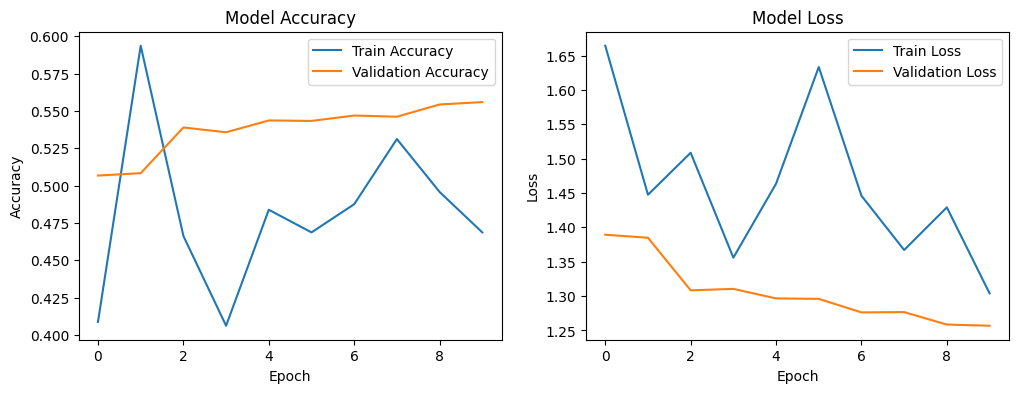

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

The figure contains two line graphs that illustrate the performance of a deep learning model over ten epochs of training.

**Insights**

**Accuracy:** The model’s accuracy on both training and validation data shows improvement. However, saturation in validation accuracy indicates the model’s generalization to new data is somewhat inconsistent.

**Loss:** The loss values reflect how well the model is learning. The initial decrease in both train and validation loss is a good sign, but the saturation in validation loss could indicate overfitting.
These graphs help diagnose the model’s learning behavior and generalization capability.

You can explore further by fine-tuning the VGGNet or trying different datasets. This hands-on session provides a comprehensive guide to using VGGNet with transfer learning.

**Assignment:** In this hands-on demonstration, I have shown you how to apply the VGG16 architecture over the CIFAR-10 dataset. Here, your task will be to improve the accuracy by adjusting the hyperparameters such as batch size, learning rate, and number of epochs to optimize model performance. Also, explore fine-tuning techniques and advanced data augmentation strategies to enhance your model’s accuracy.